<a href="https://colab.research.google.com/github/Kiktay/composites/blob/main/ds_drobot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Открытие файла и получение общей информации

## 1.1 Импорт библиотек

In [23]:
# Базовые библиотеки
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

# Визуализация
import seaborn as sns
import plotly.express as px

# Научные вычисления
import scipy
from scipy import stats as st
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Машинное обучение
from sklearn import preprocessing
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    Normalizer,
    LabelEncoder
)
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    KFold,
    cross_val_score,
    StratifiedKFold
)
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
    Ridge,
    Lasso
)
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import (
    accuracy_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)

# Глубокое обучение
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image

# Утилиты
from joblib import dump

# Настройка предупреждений
warnings.filterwarnings("default", category=FutureWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)








1.2 Чтение данных и сохранение в переменные

In [21]:
# Чтение файлов
bp_url = "https://raw.githubusercontent.com/Kiktay/composites/09321c6ec99ceb77409b5a43469af6d836d71ef7/X_bp.xlsx"
nup_url = "https://raw.githubusercontent.com/Kiktay/composites/09321c6ec99ceb77409b5a43469af6d836d71ef7/X_nup.xlsx"

bp = pd.read_excel(bp_url, engine='openpyxl')
nup = pd.read_excel(nup_url, engine='openpyxl')

# просмотр общей информации о датасете
bp.info()
# вывод на экран датасета
display(bp)
# просмотр общей информации о датасете
nup.info()
# вывод на экран датасета
display(nup)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1023 non-null   int64  
 1   Соотношение матрица-наполнитель       1023 non-null   float64
 2   Плотность, кг/м3                      1023 non-null   float64
 3   модуль упругости, ГПа                 1023 non-null   float64
 4   Количество отвердителя, м.%           1023 non-null   float64
 5   Содержание эпоксидных групп,%_2       1023 non-null   float64
 6   Температура вспышки, С_2              1023 non-null   float64
 7   Поверхностная плотность, г/м2         1023 non-null   float64
 8   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 9   Прочность при растяжении, МПа         1023 non-null   float64
 10  Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10), i

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0              0                         1.857143       2030.000000   
1              1                         1.857143       2030.000000   
2              2                         1.857143       2030.000000   
3              3                         1.857143       2030.000000   
4              4                         2.771331       2030.000000   
...          ...                              ...               ...   
1018        1018                         2.271346       1952.087902   
1019        1019                         3.444022       2050.089171   
1020        1020                         3.280604       1972.372865   
1021        1021                         3.705351       2066.799773   
1022        1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                       3000.000000               220.000000  
1                       3000.000000               220.000000  
2                       3000.000000               220.000000  
3                       3000.000000               220.000000  
4                       3000.000000               220.000000  
...                             ...                      ...  
1018                    2387.292495               125.007669  
1019                    2360.392784               117.730099  
1020                    2662.906040               236.606764  
1021                    2071.715856               197.126067  
1022     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1040 non-null   int64  
 1   Угол нашивки, град  1040 non-null   int64  
 2   Шаг нашивки         1040 non-null   float64
 3   Плотность нашивки   1040 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 32.6 KB


Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
0              0                   0     4.000000          57.000000
1              1                   0     4.000000          60.000000
2              2                   0     4.000000          70.000000
3              3                   0     5.000000          47.000000
4              4                   0     5.000000          57.000000
...          ...                 ...          ...                ...
1035        1035                  90     8.088111          47.759177
1036        1036                  90     7.619138          66.931932
1037        1037                  90     9.800926          72.858286
1038        1038                  90    10.079859          65.519479
1039        1039                  90     9.021043          66.920143

[1040 rows x 4 columns]

## 1.3 Объединяем датасеты по индексу, тип объединения INNER

переводиим все названия столбцов в нижний регистр, выводим 1 строку для проверки

In [ ]:
df = pd.merge(bp, nup, on=["Unnamed: 0"], how='inner')

In [ ]:
# вывод на экран датасета
df.T

0            1            2     \
Unnamed: 0                               0.000000     1.000000     2.000000   
Соотношение матрица-наполнитель          1.857143     1.857143     1.857143   
Плотность, кг/м3                      2030.000000  2030.000000  2030.000000   
модуль упругости, ГПа                  738.736842   738.736842   738.736842   
Количество отвердителя, м.%             30.000000    50.000000    49.900000   
Содержание эпоксидных групп,%_2         22.267857    23.750000    33.000000   
Температура вспышки, С_2               100.000000   284.615385   284.615385   
Поверхностная плотность, г/м2          210.000000   210.000000   210.000000   
Модуль упругости при растяжении, ГПа    70.000000    70.000000    70.000000   
Прочность при растяжении, МПа         3000.000000  3000.000000  3000.000000   
Потребление смолы, г/м2                220.000000   220.000000   220.000000   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              4.000000     4.000000     4.000000   
Плотность нашивки                       57.000000    60.000000    70.000000   

                                             3            4            5     \
Unnamed: 0                               3.000000     4.000000     5.000000   
Соотношение матрица-наполнитель          1.857143     2.771331     2.767918   
Плотность, кг/м3                      2030.000000  2030.000000  2000.000000   
модуль упругости, ГПа                  738.736842   753.000000   748.000000   
Количество отвердителя, м.%            129.000000   111.860000   111.860000   
Содержание эпоксидных групп,%_2         21.250000    22.267857    22.267857   
Температура вспышки, С_2               300.000000   284.615385   284.615385   
Поверхностная плотность, г/м2          210.000000   210.000000   210.000000   
Модуль упругости при растяжении, ГПа    70.000000    70.000000    70.000000   
Прочность при растяжении, МПа         3000.000000  3000.000000  3000.000000   
Потребление смолы, г/м2                220.000000   220.000000   220.000000   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              5.000000     5.000000     5.000000   
Плотность нашивки                       47.000000    57.000000    60.000000   

                                             6            7            8     \
Unnamed: 0                               6.000000     7.000000     8.000000   
Соотношение матрица-наполнитель          2.569620     2.561475     3.557018   
Плотность, кг/м3                      1910.000000  1900.000000  1930.000000   
модуль упругости, ГПа                  807.000000   535.000000   889.000000   
Количество отвердителя, м.%            111.860000   111.860000   129.000000   
Содержание эпоксидных групп,%_2         22.267857    22.267857    21.250000   
Температура вспышки, С_2               284.615385   284.615385   300.000000   
Поверхностная плотность, г/м2          210.000000   380.000000   380.000000   
Модуль упругости при растяжении, ГПа    70.000000    75.000000    75.000000   
Прочность при растяжении, МПа         3000.000000  1800.000000  1800.000000   
Потребление смолы, г/м2                220.000000   120.000000   120.000000   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              5.000000     7.000000     7.000000   
Плотность нашивки                       70.000000    47.000000    57.000000   

                                             9     ...         1013  \
Unnamed: 0                               9.000000  ...  1013.000000   
Соотношение матрица-наполнитель          3.532338  ...     2.310394   
Плотность, кг/м3                      2100.000000  ...  1931.146887   
модуль упругости, ГПа                 1421.000000  ...   554.010341   
Количество отвердителя, м.%            129.000000  ...    96.749782   
Содержание эпоксидных групп,%_2         21.250000  ...    22.

In [ ]:
# просмотр общей информации о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1023 non-null   int64  
 1   Соотношение матрица-наполнитель       1023 non-null   float64
 2   Плотность, кг/м3                      1023 non-null   float64
 3   модуль упругости, ГПа                 1023 non-null   float64
 4   Количество отвердителя, м.%           1023 non-null   float64
 5   Содержание эпоксидных групп,%_2       1023 non-null   float64
 6   Температура вспышки, С_2              1023 non-null   float64
 7   Поверхностная плотность, г/м2         1023 non-null   float64
 8   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 9   Прочность при растяжении, МПа         1023 non-null   float64
 10  Потребление смолы, г/м2               1023 non-null   float64
 11  Угол нашивки, гра

In [ ]:
# вывод на экран датасета
df.T

0            1            2     \
Unnamed: 0                               0.000000     1.000000     2.000000   
Соотношение матрица-наполнитель          1.857143     1.857143     1.857143   
Плотность, кг/м3                      2030.000000  2030.000000  2030.000000   
модуль упругости, ГПа                  738.736842   738.736842   738.736842   
Количество отвердителя, м.%             30.000000    50.000000    49.900000   
Содержание эпоксидных групп,%_2         22.267857    23.750000    33.000000   
Температура вспышки, С_2               100.000000   284.615385   284.615385   
Поверхностная плотность, г/м2          210.000000   210.000000   210.000000   
Модуль упругости при растяжении, ГПа    70.000000    70.000000    70.000000   
Прочность при растяжении, МПа         3000.000000  3000.000000  3000.000000   
Потребление смолы, г/м2                220.000000   220.000000   220.000000   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              4.000000     4.000000     4.000000   
Плотность нашивки                       57.000000    60.000000    70.000000   

                                             3            4            5     \
Unnamed: 0                               3.000000     4.000000     5.000000   
Соотношение матрица-наполнитель          1.857143     2.771331     2.767918   
Плотность, кг/м3                      2030.000000  2030.000000  2000.000000   
модуль упругости, ГПа                  738.736842   753.000000   748.000000   
Количество отвердителя, м.%            129.000000   111.860000   111.860000   
Содержание эпоксидных групп,%_2         21.250000    22.267857    22.267857   
Температура вспышки, С_2               300.000000   284.615385   284.615385   
Поверхностная плотность, г/м2          210.000000   210.000000   210.000000   
Модуль упругости при растяжении, ГПа    70.000000    70.000000    70.000000   
Прочность при растяжении, МПа         3000.000000  3000.000000  3000.000000   
Потребление смолы, г/м2                220.000000   220.000000   220.000000   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              5.000000     5.000000     5.000000   
Плотность нашивки                       47.000000    57.000000    60.000000   

                                             6            7            8     \
Unnamed: 0                               6.000000     7.000000     8.000000   
Соотношение матрица-наполнитель          2.569620     2.561475     3.557018   
Плотность, кг/м3                      1910.000000  1900.000000  1930.000000   
модуль упругости, ГПа                  807.000000   535.000000   889.000000   
Количество отвердителя, м.%            111.860000   111.860000   129.000000   
Содержание эпоксидных групп,%_2         22.267857    22.267857    21.250000   
Температура вспышки, С_2               284.615385   284.615385   300.000000   
Поверхностная плотность, г/м2          210.000000   380.000000   380.000000   
Модуль упругости при растяжении, ГПа    70.000000    75.000000    75.000000   
Прочность при растяжении, МПа         3000.000000  1800.000000  1800.000000   
Потребление смолы, г/м2                220.000000   120.000000   120.000000   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              5.000000     7.000000     7.000000   
Плотность нашивки                       70.000000    47.000000    57.000000   

                                             9     ...         1013  \
Unnamed: 0                               9.000000  ...  1013.000000   
Соотношение матрица-наполнитель          3.532338  ...     2.310394   
Плотность, кг/м3                      2100.000000  ...  1931.146887   
модуль упругости, ГПа                 1421.000000  ...   554.010341   
Количество отвердителя, м.%            129.000000  ...    96.749782   
Содержание эпоксидных групп,%_2         21.250000  ...    22.

#### удалим столбец с названием в "Unnamed: 0"

In [ ]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
df.head(1)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                         30.0                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                     100.0                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0

# 2. Подготовка данных

Заменим названия столбцов, а именно приведем заголовки к нижнему регистру.

In [ ]:
df.columns = df.columns.str.lower()
df.head(1)

соотношение матрица-наполнитель  плотность, кг/м3  модуль упругости, гпа  \
0                         1.857143            2030.0             738.736842   

   количество отвердителя, м.%  содержание эпоксидных групп,%_2  \
0                         30.0                        22.267857   

   температура вспышки, с_2  поверхностная плотность, г/м2  \
0                     100.0                          210.0   

   модуль упругости при растяжении, гпа  прочность при растяжении, мпа  \
0                                  70.0                         3000.0   

   потребление смолы, г/м2  угол нашивки, град  шаг нашивки  плотность нашивки  
0                    220.0                   0          4.0               57.0

Проверим, есть ли пропущенные значения в каждой переменной.

In [ ]:
df.nunique()

соотношение матрица-наполнитель         1014
плотность, кг/м3                        1013
модуль упругости, гпа                   1020
количество отвердителя, м.%             1005
содержание эпоксидных групп,%_2         1004
температура вспышки, с_2                1003
поверхностная плотность, г/м2           1004
модуль упругости при растяжении, гпа    1004
прочность при растяжении, мпа           1004
потребление смолы, г/м2                 1003
угол нашивки, град                         2
шаг нашивки                              989
плотность нашивки                        988
dtype: int64

In [ ]:
# проихводим обнаружение аномалий, с помощью боксплотов
for column in df.columns:
    fig = px.box(df, y = column)
    fig.show()

In [ ]:
#найдем количество выбросов с помощью метода межквартальных диапазонов (IQR)
metod_iqr = 0
summ_iqr = [] # Список, куда записывается количество выбросов по каждой колонке датафрейма методом.
for column in df:
    d = df.loc[:, [column]]

    q1 = np.quantile(df[column], 0.25)

    q3 = np.quantile(df[column], 0.75)

    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    metod_iqr += d['iq'].sum()
    summ_iqr.append(d['iq'].sum())
    print(column, ': ', d['iq'].sum())
print('Метод межквартильных расстояний, выбросов:', metod_iqr)

соотношение матрица-наполнитель :  6
плотность, кг/м3 :  9
модуль упругости, гпа :  2
количество отвердителя, м.% :  14
содержание эпоксидных групп,%_2 :  2
температура вспышки, с_2 :  8
поверхностная плотность, г/м2 :  2
модуль упругости при растяжении, гпа :  6
прочность при растяжении, мпа :  11
потребление смолы, г/м2 :  8
угол нашивки, град :  0
шаг нашивки :  4
плотность нашивки :  21
Метод межквартильных расстояний, выбросов: 93


In [ ]:

#создадим список столбцов, в которых есть выбросы
column_drop = ["соотношение матрица-наполнитель",
                 "плотность, кг/м3",
                 "модуль упругости, гпа",
                 "количество отвердителя, м.%",
                 "содержание эпоксидных групп,%_2",
                 "температура вспышки, с_2",
                 "поверхностная плотность, г/м2",
                 "модуль упругости при растяжении, гпа",
                 "прочность при растяжении, мпа",
                 "потребление смолы, г/м2",
                 "шаг нашивки",
                 "плотность нашивки"]

In [ ]:
#удаляем выбросы
for i in column_drop:
    q75, q25 = np.percentile(df.loc[:,i], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan
df = df.dropna(axis=0)

In [ ]:
for i in df.columns:
    q75, q25 = np.percentile(df.loc[:,i], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan
df.dropna(inplace = True)

In [ ]:
#проверим остались ли, NaN значения
df.isnull().sum()
#NaN значения не обнаружены

соотношение матрица-наполнитель         0
плотность, кг/м3                        0
модуль упругости, гпа                   0
количество отвердителя, м.%             0
содержание эпоксидных групп,%_2         0
температура вспышки, с_2                0
поверхностная плотность, г/м2           0
модуль упругости при растяжении, гпа    0
прочность при растяжении, мпа           0
потребление смолы, г/м2                 0
угол нашивки, град                      0
шаг нашивки                             0
плотность нашивки                       0
dtype: int64

In [ ]:
# проверим ещё раз наличие выбросов
metod_iqr = 0
summ_iqr = [] # Список, куда записывается количество выбросов по каждой колонке датафрейма методом.
for column in df:
    d = df.loc[:, [column]]

    q1 = np.quantile(df[column], 0.25)

    q3 = np.quantile(df[column], 0.75)

    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    metod_iqr += d['iq'].sum()
    summ_iqr.append(d['iq'].sum())
    print(column, ': ', d['iq'].sum())
print('Метод межквартильных расстояний, выбросов:', metod_iqr)

соотношение матрица-наполнитель :  0
плотность, кг/м3 :  0
модуль упругости, гпа :  0
количество отвердителя, м.% :  0
содержание эпоксидных групп,%_2 :  0
температура вспышки, с_2 :  0
поверхностная плотность, г/м2 :  0
модуль упругости при растяжении, гпа :  0
прочность при растяжении, мпа :  2
потребление смолы, г/м2 :  1
угол нашивки, град :  0
шаг нашивки :  0
плотность нашивки :  1
Метод межквартильных расстояний, выбросов: 4


In [ ]:
#ещё раз удаляем выбросы
for i in column_drop:
    q75, q25 = np.percentile(df.loc[:,i], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan
df = df.dropna(axis=0)

In [ ]:
# проверим ещё раз наличие выбросов
metod_iqr = 0
summ_iqr = [] # Список, куда записывается количество выбросов по каждой колонке датафрейма методом.
for column in df:
    d = df.loc[:, [column]]

    q1 = np.quantile(df[column], 0.25)

    q3 = np.quantile(df[column], 0.75)

    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    metod_iqr += d['iq'].sum()
    summ_iqr.append(d['iq'].sum())
    print(column, ': ', d['iq'].sum())
print('Метод межквартильных расстояний, выбросов:', metod_iqr)

соотношение матрица-наполнитель :  0
плотность, кг/м3 :  0
модуль упругости, гпа :  0
количество отвердителя, м.% :  0
содержание эпоксидных групп,%_2 :  0
температура вспышки, с_2 :  0
поверхностная плотность, г/м2 :  0
модуль упругости при растяжении, гпа :  0
прочность при растяжении, мпа :  0
потребление смолы, г/м2 :  0
угол нашивки, град :  0
шаг нашивки :  0
плотность нашивки :  0
Метод межквартильных расстояний, выбросов: 0


In [ ]:
#найдем количество выбросов с помощью метода межквартальных диапазонов (IQR)
metod_iqr = 0
summ_iqr = []
for column in df:
    d = df.loc[:, [column]]

    q1 = np.quantile(df[column], 0.25)

    q3 = np.quantile(df[column], 0.75)

    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    metod_iqr += d['iq'].sum()
    summ_iqr.append(d['iq'].sum())
    print(column, ': ', d['iq'].sum())
print('Метод межквартильных расстояний, выбросов:', metod_iqr)

соотношение матрица-наполнитель :  0
плотность, кг/м3 :  0
модуль упругости, гпа :  0
количество отвердителя, м.% :  0
содержание эпоксидных групп,%_2 :  0
температура вспышки, с_2 :  0
поверхностная плотность, г/м2 :  0
модуль упругости при растяжении, гпа :  0
прочность при растяжении, мпа :  0
потребление смолы, г/м2 :  0
угол нашивки, град :  0
шаг нашивки :  0
плотность нашивки :  0
Метод межквартильных расстояний, выбросов: 0


In [ ]:
#посмотрим сводную описательной статистики по датафрейму
df.describe()

соотношение матрица-наполнитель  плотность, кг/м3  \
count                       922.000000        922.000000   
mean                          2.927964       1974.118744   
std                           0.895472         71.040648   
min                           0.547391       1784.482245   
25%                           2.320191       1923.318006   
50%                           2.907832       1977.321002   
75%                           3.549367       2020.053266   
max                           5.314144       2161.565216   

       модуль упругости, гпа  количество отвердителя, м.%  \
count             922.000000                   922.000000   
mean              736.119982                   111.136066   
std               327.607008                    26.753228   
min                 2.436909                    38.668500   
25%               498.538615                    92.856591   
50%               736.178435                   111.162090   
75%               956.955626                   130.109815   
max              1628.000000                   181.828448   

       содержание эпоксидных групп,%_2  температура вспышки, с_2  \
count                       922.000000                922.000000   
mean                         22.200570                286.181128   
std                           2.393926                 39.420764   
min                          15.695894                179.374391   
25%                          20.556328                259.205321   
50%                          22.177681                286.220763   
75%                          23.956980                313.012786   
max                          28.955094                386.067992   

       поверхностная плотность, г/м2  модуль упругости при растяжении, гпа  \
count                     922.000000                            922.000000   
mean                      482.429070                             73.303464   
std                       280.437329                              3.025864   
min                         0.603740                             65.793845   
25%                       264.345872                             71.241213   
50%                       457.732246                             73.247594   
75%                       695.531920                             75.310130   
max                      1291.340115                             81.203147   

       прочность при растяжении, мпа  потребление смолы, г/м2  \
count                     922.000000               922.000000   
mean                     2461.491315               218.048059   
std                       453.564734                57.137475   
min                      1250.392802                72.530873   
25%                      2148.175736               179.875097   
50%                      2455.974462               218.697660   
75%                      2751.233766               256.623860   
max                      3654.434359               359.052220   

       угол нашивки, град  шаг нашивки  плотность нашивки  
count          922.000000   922.000000         922.000000  
mean            45.976139     6.931939          57.562887  
std             45.013829     2.514184          11.122204  
min              0.000000     0.037639          28.661632  
25%              0.000000     5.143644          50.275385  
50%             90.000000     6.972862          57.584225  
75%             90.000000     8.612094          64.840898  
max             90.000000    13.732404          86.012427

In [ ]:
#сделаем нормализацию данных с помощью Normalizer()
scaler = Normalizer()
names = df.columns
d = scaler.fit_transform(df)

scaled_df = pd.DataFrame(d, columns=names)
#посмотрим сводную описательной статистики после нормализации данных
scaled_df.describe()

соотношение матрица-наполнитель  плотность, кг/м3  \
count                       922.000000        922.000000   
mean                          0.000885          0.596933   
std                           0.000286          0.064469   
min                           0.000163          0.444650   
25%                           0.000685          0.552643   
50%                           0.000872          0.591998   
75%                           0.001067          0.640028   
max                           0.001803          0.823683   

       модуль упругости, гпа  количество отвердителя, м.%  \
count             922.000000                   922.000000   
mean                0.220034                     0.033650   
std                 0.095697                     0.008970   
min                 0.000709                     0.011339   
25%                 0.150854                     0.027607   
50%                 0.219789                     0.033547   
75%                 0.289210                     0.039557   
max                 0.524864                     0.062919   

       содержание эпоксидных групп,%_2  температура вспышки, с_2  \
count                       922.000000                922.000000   
mean                          0.006715                  0.086555   
std                           0.001016                  0.015040   
min                           0.004113                  0.049402   
25%                           0.005990                  0.076164   
50%                           0.006653                  0.084991   
75%                           0.007346                  0.096577   
max                           0.010879                  0.147861   

       поверхностная плотность, г/м2  модуль упругости при растяжении, гпа  \
count                     922.000000                            922.000000   
mean                        0.144856                              0.022170   
std                         0.083856                              0.002484   
min                         0.000230                              0.016105   
25%                         0.080741                              0.020402   
50%                         0.140085                              0.021966   
75%                         0.204258                              0.023756   
max                         0.414371                              0.030598   

       прочность при растяжении, мпа  потребление смолы, г/м2  \
count                     922.000000               922.000000   
mean                        0.730955                 0.065896   
std                         0.069241                 0.018504   
min                         0.462927                 0.021630   
25%                         0.688019                 0.052457   
50%                         0.740423                 0.065555   
75%                         0.780490                 0.077870   
max                         0.877580                 0.122973   

       угол нашивки, град  шаг нашивки  плотность нашивки  
count          922.000000   922.000000         922.000000  
mean             0.013900     0.002100           0.017398  
std              0.013765     0.000808           0.003793  
min              0.000000     0.000011           0.007195  
25%              0.000000     0.001543           0.014855  
50%              0.021931     0.002053           0.017293  
75%              0.027092     0.002629           0.019756  
max              0.037721     0.004519           0.030905

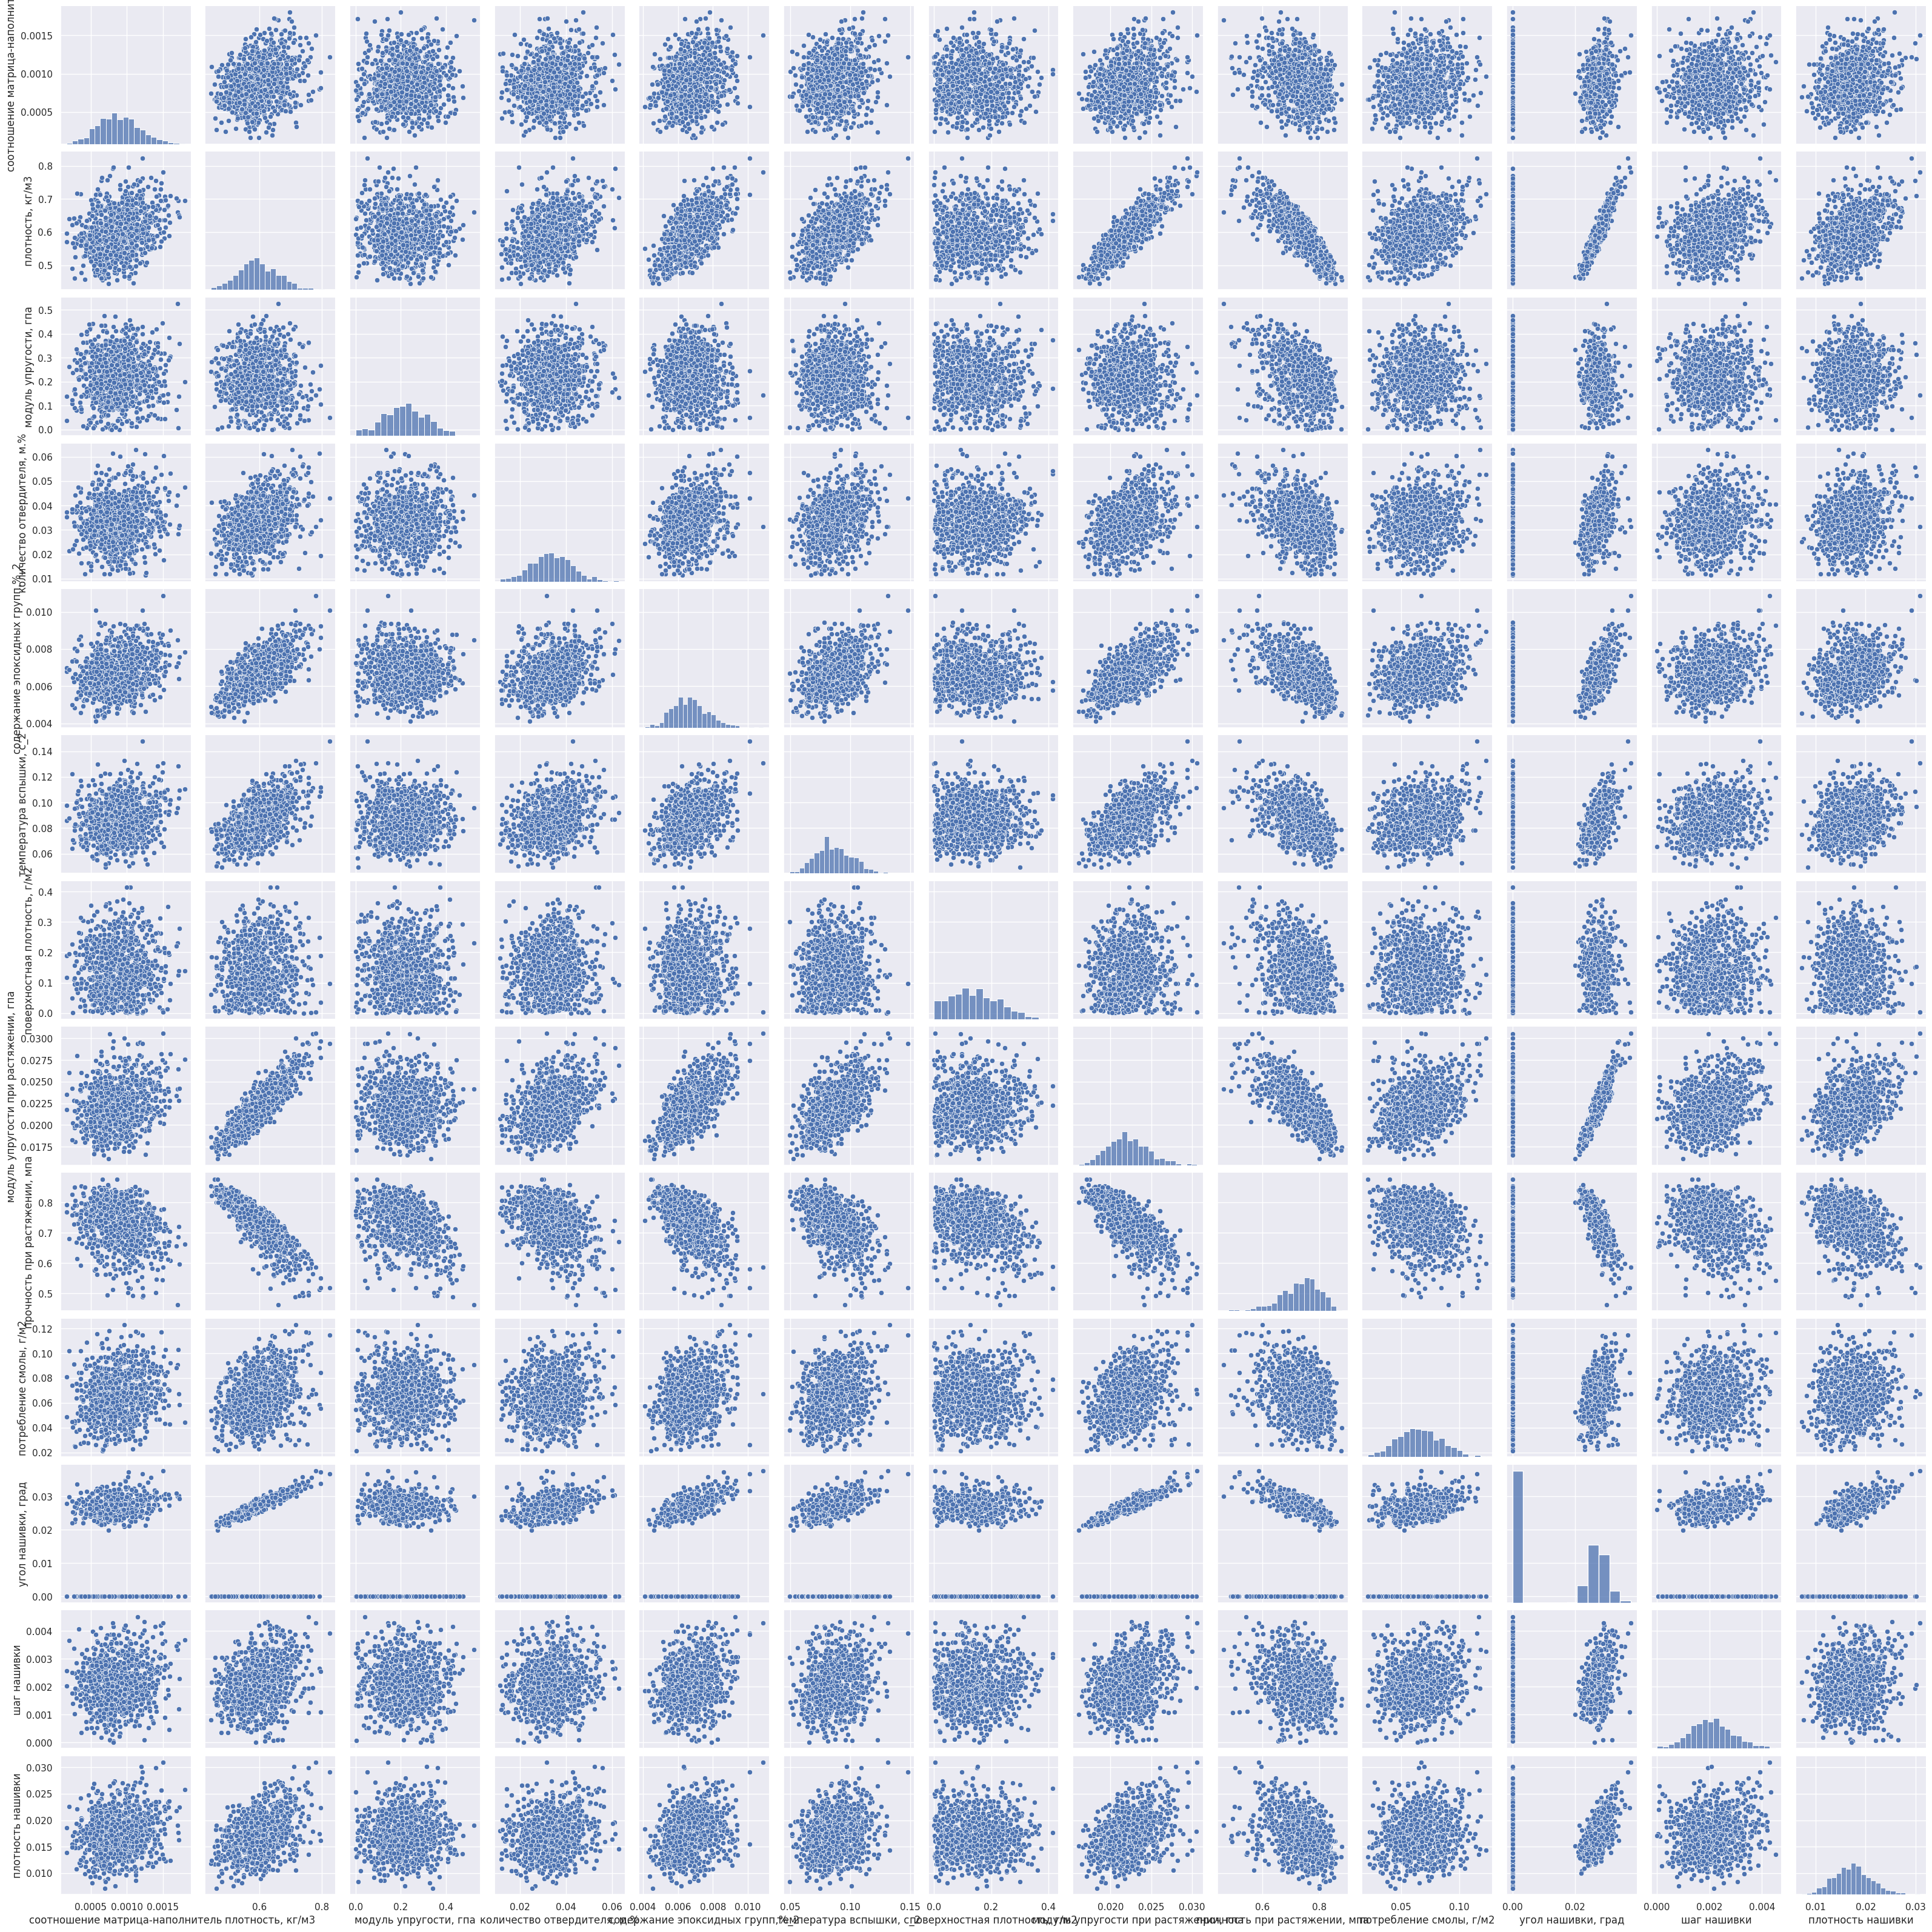

In [ ]:
#построим график попарного соотношения каждым признаком
sns.pairplot(scaled_df)

<Axes: >

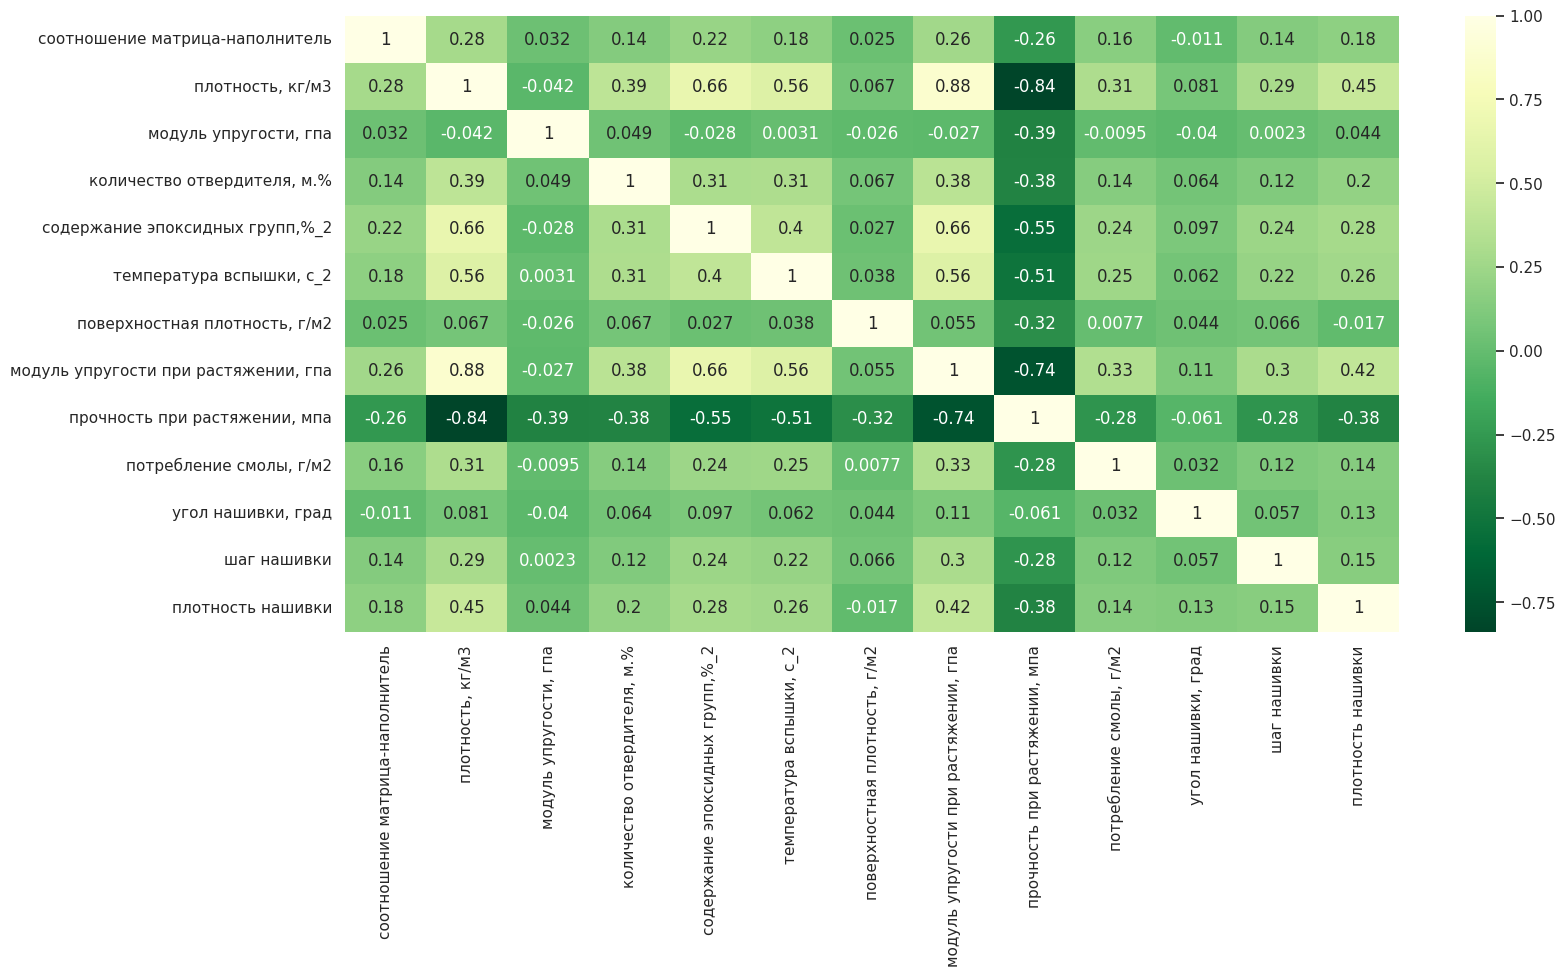

In [ ]:

#визуализируем корреляцию между переменными
plt.figure(figsize=[17,8])
sns.heatmap(scaled_df.corr(),annot=True, cmap = 'YlGn_r')

In [ ]:
df_norm = df.copy(deep=True)
mmscaler = MinMaxScaler()
columns = df.columns

df_norm[columns] = mmscaler.fit_transform(df_norm[columns])


Построим график "ящик с усами" после нормализации.

<ipython-input-99-baf6c16df95f>:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



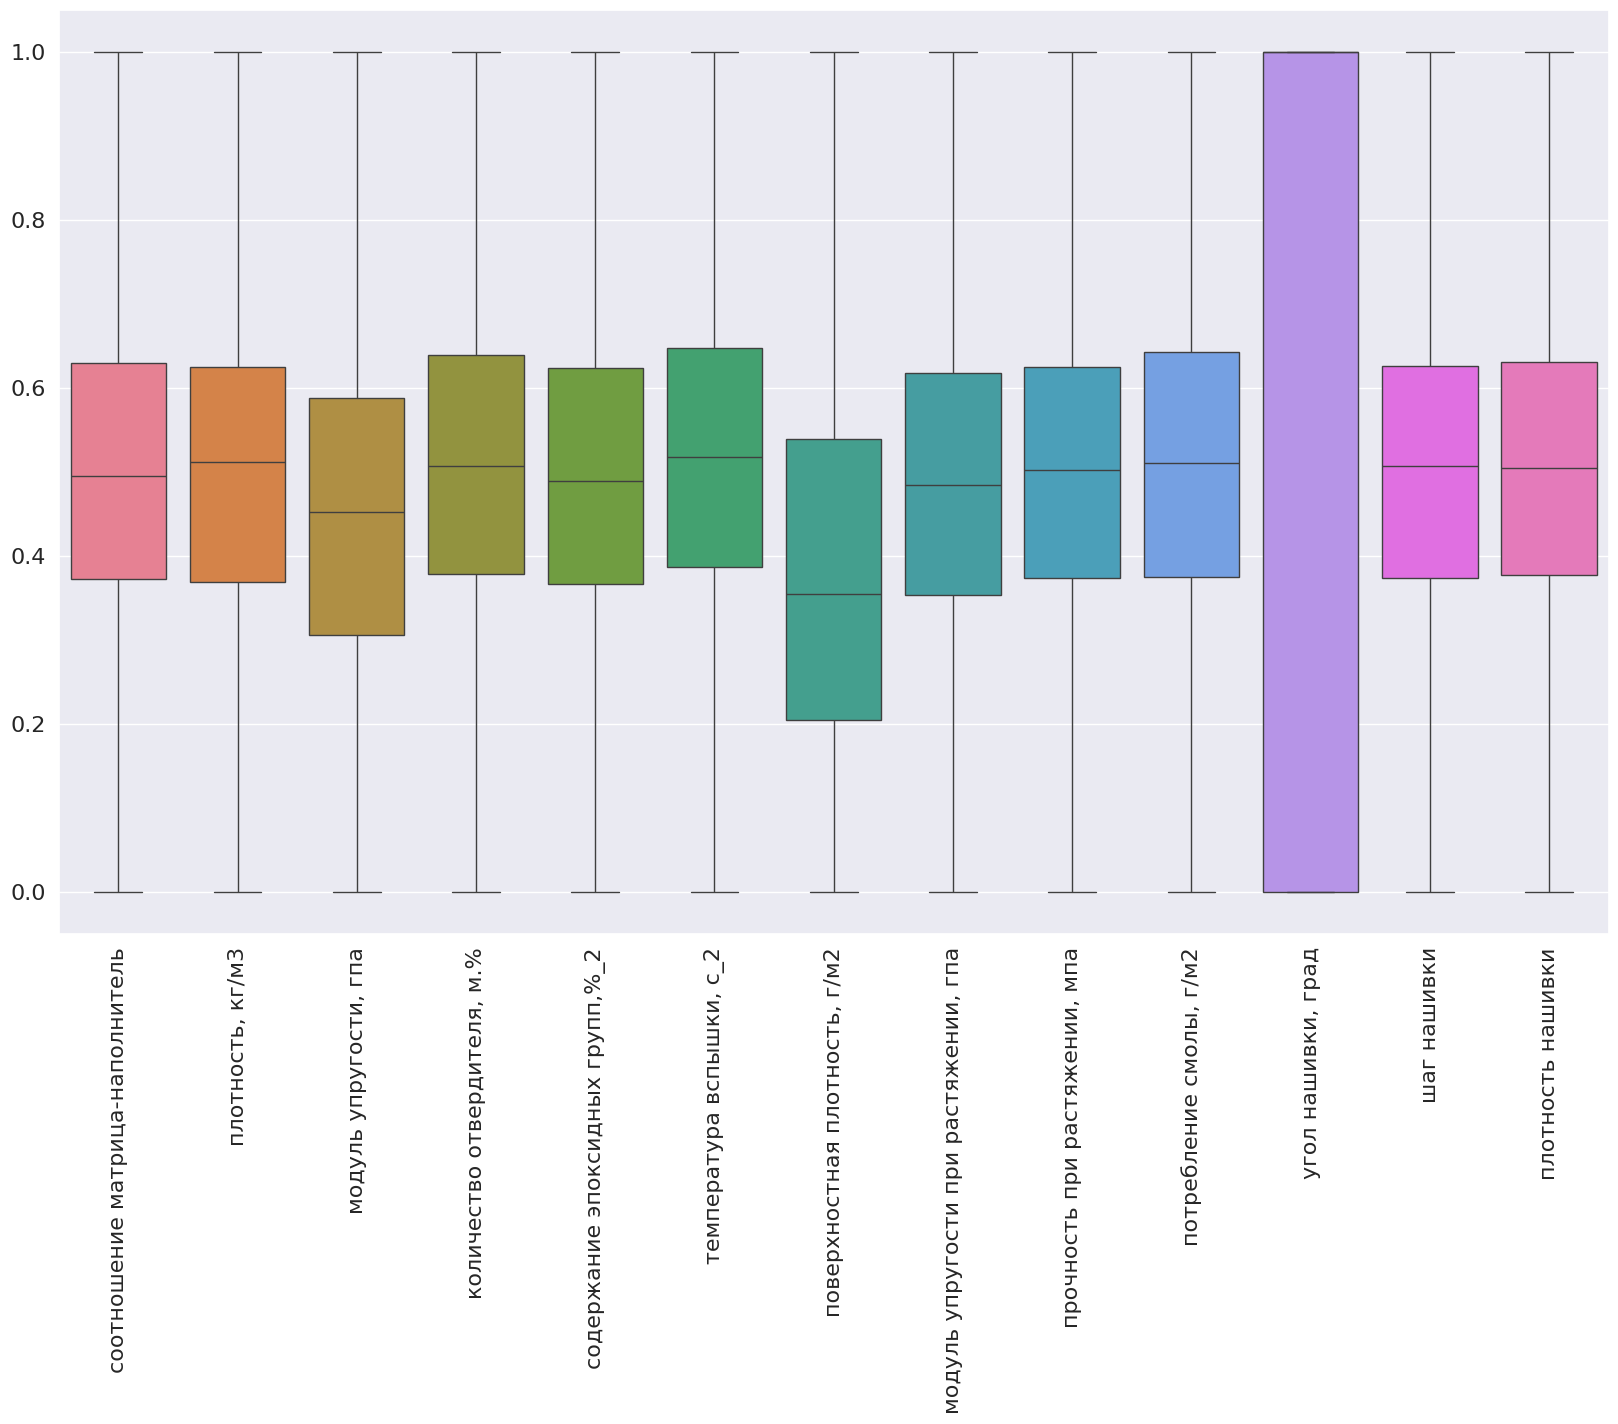

In [ ]:
sns.set(rc={'figure.figsize':(20,12)})
ax = sns.boxplot(data=df_norm)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

Посмотрим оценку плотности ядра после нормализации.

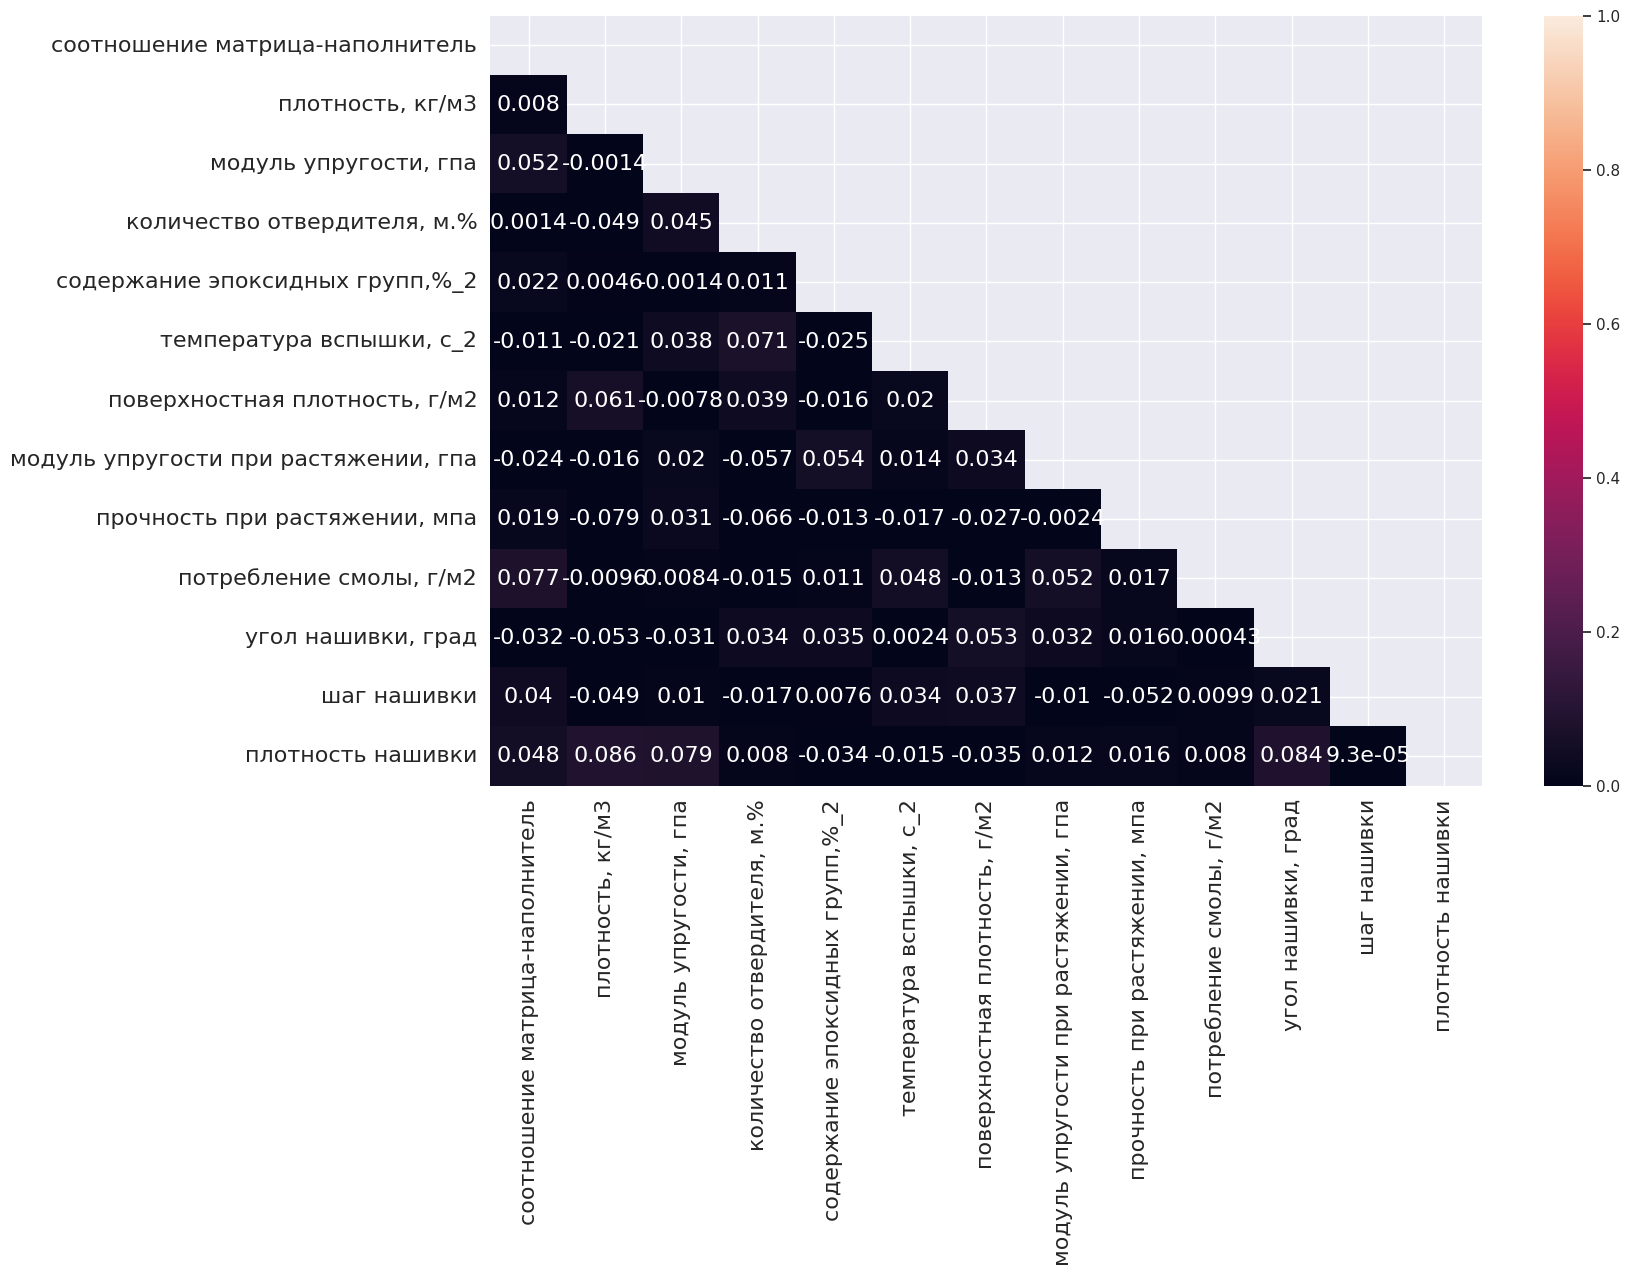

In [ ]:
mask = np.zeros_like(df_norm.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
plt.figure(figsize=(16,10))
sns.heatmap(df_norm.corr(), mask=mask, vmin=0, vmax=1, annot=True, annot_kws={"size": 16})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
# Проверим, корректно ли посчитана корреляция
print("Реальные значения корреляции (без фильтрации):")
print(df_norm.corr().unstack().sort_values(ascending=False).drop_duplicates())

Реальные значения корреляции (без фильтрации):
соотношение матрица-наполнитель       соотношение матрица-наполнитель    1.000000
плотность, кг/м3                      плотность нашивки                  0.086460
угол нашивки, град                    плотность нашивки                  0.083564
плотность нашивки                     модуль упругости, гпа              0.078810
соотношение матрица-наполнитель       потребление смолы, г/м2            0.076857
                                                                           ...   
шаг нашивки                           прочность при растяжении, мпа     -0.051580
угол нашивки, град                    плотность, кг/м3                  -0.052993
модуль упругости при растяжении, гпа  количество отвердителя, м.%       -0.057026
прочность при растяжении, мпа         количество отвердителя, м.%       -0.065711
плотность, кг/м3                      прочность при растяжении, мпа     -0.079188
Length: 79, dtype: float64


# 3. Модели машинного обучения

**Описание процесса обучения моделей машинного обучения**

Для прогнозирования двух ключевых параметров — модуля упругости при растяжении (ГПа) и прочности при растяжении (МПа) — будут исследованы пять алгоритмов машинного обучения:

1. Линейная регрессия

2. Случайный лес (Random Forest)

3. Градиентный бустинг (Gradient Boosting)

4. Метод K ближайших соседей (KNN)

5. Метод опорных векторов (SVM)

**Критерий оценки моделей**

В качестве метрики качества выбрана **среднеквадратическая ошибка (MSE)**. Эта метрика вычисляет среднее значение квадратов разностей между предсказанными и реальными значениями. Чем меньше MSE, тем точнее модель.

**Преимущества MSE:**

Может применяться как к нормализованным, так и к ненормализованным данным.

Позволяет оценить степень отклонения прогнозов от фактических значений.

Особенности подхода
Каждая модель будет обучаться и оцениваться отдельно для каждого параметра, поскольку не все алгоритмы поддерживают одновременное предсказание нескольких целевых переменных. Такой подход обеспечивает гибкость и точность в выборе наилучшей модели для каждой характеристики.

Построим модели для прогноза модуля упругости при растяжении и прочности при растяжении.

## 3.1. Параметр "Модуль упругости при растяжении, ГПа"

In [ ]:
#Создадим модели для пргонозирования параметра "модуль упругости, ГПа"
#для создания моделей машинного обучения разделим выборку на обучающую и тестовую
#разбиваем в соотношении 70% обучающая и 30% тестовая
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
    scaled_df.loc[:, scaled_df.columns != 'модуль упругости, гпа'],
    df[['модуль упругости, гпа']],
       test_size = 0.3,
    random_state = 42)

In [ ]:
# Проверка правильности разбивки
scaled_df.shape[0] - x_train_1.shape[0] - x_test_1.shape[0]

0

In [ ]:
x_train_1.head()

соотношение матрица-наполнитель  плотность, кг/м3  \
481                         0.000528          0.588865   
650                         0.000430          0.617063   
483                         0.000580          0.585227   
355                         0.000911          0.545896   
850                         0.000573          0.595470   

     количество отвердителя, м.%  содержание эпоксидных групп,%_2  \
481                     0.020990                         0.006252   
650                     0.027241                         0.007343   
483                     0.043386                         0.007071   
355                     0.024469                         0.006610   
850                     0.034151                         0.007516   

     температура вспышки, с_2  поверхностная плотность, г/м2  \
481                  0.071426                       0.186019   
650                  0.075550                       0.081315   
483                  0.096516                       0.132760   
355                  0.070488                       0.159918   
850                  0.089544                       0.095557   

     модуль упругости при растяжении, гпа  прочность при растяжении, мпа  \
481                              0.020212                       0.767419   
650                              0.024828                       0.739696   
483                              0.021190                       0.772233   
355                              0.018527                       0.757679   
850                              0.023511                       0.740451   

     потребление смолы, г/м2  угол нашивки, град  шаг нашивки  \
481                 0.073012            0.026146     0.002284   
650                 0.056818            0.027692     0.001349   
483                 0.041473            0.026529     0.002249   
355                 0.050148            0.000000     0.001774   
850                 0.086300            0.028987     0.002764   

     плотность нашивки  
481           0.015558  
650           0.018303  
483           0.018923  
355           0.012540  
850           0.017172

In [ ]:
x_train_1.head()

соотношение матрица-наполнитель  плотность, кг/м3  \
481                         0.000528          0.588865   
650                         0.000430          0.617063   
483                         0.000580          0.585227   
355                         0.000911          0.545896   
850                         0.000573          0.595470   

     количество отвердителя, м.%  содержание эпоксидных групп,%_2  \
481                     0.020990                         0.006252   
650                     0.027241                         0.007343   
483                     0.043386                         0.007071   
355                     0.024469                         0.006610   
850                     0.034151                         0.007516   

     температура вспышки, с_2  поверхностная плотность, г/м2  \
481                  0.071426                       0.186019   
650                  0.075550                       0.081315   
483                  0.096516                       0.132760   
355                  0.070488                       0.159918   
850                  0.089544                       0.095557   

     модуль упругости при растяжении, гпа  прочность при растяжении, мпа  \
481                              0.020212                       0.767419   
650                              0.024828                       0.739696   
483                              0.021190                       0.772233   
355                              0.018527                       0.757679   
850                              0.023511                       0.740451   

     потребление смолы, г/м2  угол нашивки, град  шаг нашивки  \
481                 0.073012            0.026146     0.002284   
650                 0.056818            0.027692     0.001349   
483                 0.041473            0.026529     0.002249   
355                 0.050148            0.000000     0.001774   
850                 0.086300            0.028987     0.002764   

     плотность нашивки  
481           0.015558  
650           0.018303  
483           0.018923  
355           0.012540  
850           0.017172

In [ ]:
y_test_1

модуль упругости, гпа
360             429.919092
427             751.441920
611              31.608469
336             723.921402
604             341.672132
..                     ...
479            1026.233755
149             691.301685
561            1209.768416
632            1490.320115
411             472.313295

[277 rows x 1 columns]

In [ ]:
#создадим функцию для сравнения результатов предсказаний с моделью, выдающей среднее значение по тестовой выборке
def mean_model(y_test_1):
    return [np.mean(y_test_1, axis=0) for _ in range(len(y_test_1))]
y_1_pred_mean = mean_model(y_test_1)

In [ ]:
#построение модели Линейной регрессии
lr = LinearRegression().fit(x_train_1, y_train_1)
y_pred_lr = lr.predict(x_test_1)
mae_lr = mean_absolute_error(y_pred_lr, y_test_1)
mse_lin_elast = mean_squared_error(y_test_1, y_pred_lr)
lr_test_score = lr.score(x_train_1, y_train_1)
lr_score = lr.score(x_test_1, y_test_1)
lr_mape = mean_absolute_percentage_error(y_test_1, y_pred_lr)
print('коэффициент детерминации для тестовой выборки (R2): {:.2%}'.format(lr_test_score))
print('коэффициент детерминации обучающей выборки (R2): {:.2%}'.format(lr_score))
print('средняя абсолютная ошибка (MAE):', round(mean_absolute_error(y_test_1, y_pred_lr)))
print('средняя абсолютная ошибка в процентах  (MAPE): {:.2%}'.format(lr_mape),)
print('средняя квадратическая ошибка (MSE): {:.2f}'.format(mse_lin_elast))
print('корень из среднеквадратичной ошибки (RMSE): {:.2f}'.format (np.sqrt(mse_lin_elast)))

коэффициент детерминации для тестовой выборки (R2): 81.05%
коэффициент детерминации обучающей выборки (R2): 80.57%
средняя абсолютная ошибка (MAE): 109
средняя абсолютная ошибка в процентах  (MAPE): 47.98%
средняя квадратическая ошибка (MSE): 21519.88
корень из среднеквадратичной ошибки (RMSE): 146.70


In [ ]:
#построение модели по методу Случайный лес (Random Forest)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train_1, np.ravel(y_train_1))
y_pred_rf = rf_model.predict(x_test_1)
rf_test_score = rf_model.score(x_test_1, y_test_1)
rf_train_score = rf_model.score(x_train_1, y_train_1)
mae_rf = mean_absolute_error(y_test_1, y_pred_rf)
mse_rf = mean_squared_error(y_test_1, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test_1, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print('Коэффициент детерминации тестовой выборки (R²): {:.2%}'.format(rf_test_score))
print('Коэффициент детерминации обучающей выборки (R²): {:.2%}'.format(rf_train_score))
print('Средняя абсолютная ошибка (MAE): {:.2f}'.format(mae_rf))
print('Средняя абсолютная ошибка в процентах (MAPE): {:.2%}'.format(mape_rf))
print('Средняя квадратическая ошибка (MSE): {:.2f}'.format(mse_rf))
print('Корень из среднеквадратичной ошибки (RMSE): {:.2f}'.format(rmse_rf))

Коэффициент детерминации тестовой выборки (R²): 74.39%
Коэффициент детерминации обучающей выборки (R²): 96.67%
Средняя абсолютная ошибка (MAE): 117.08
Средняя абсолютная ошибка в процентах (MAPE): 56.23%
Средняя квадратическая ошибка (MSE): 28354.60
Корень из среднеквадратичной ошибки (RMSE): 168.39


In [ ]:
#построение модели по методу К ближайших соседей - K Neighbors Regressor (KNN)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train_1, y_train_1)
y_pred_knn = knn.predict(x_test_1)
mae_knr = mean_absolute_error(y_pred_knn, y_test_1)
mse_knn_elast = mean_squared_error(y_test_1,y_pred_knn)
knn_test_score = knn.score(x_train_1, y_train_1)
knn_score = knn.score(x_test_1, y_test_1)
print('коэффициент детерминации для тестовой выборки (R2): {:.2%}'.format(knn_test_score))
print('коэффициент детерминации обучающей выборки (R2): {:.2%}'.format(knn_score))
print('средняя абсолютная ошибка (MAE):', round(mean_absolute_error(y_test_1, y_pred_knn)))
print('средняя абсолютная ошибка в процентах  (MAPE): {:.2%}'.format(mean_absolute_percentage_error(y_test_1, y_pred_knn)))
print('средняя квадратическая ошибка (MSE): {:.2f}'.format(mse_knn_elast))
print("корень из среднеквадратичной ошибки (RMSE): {:.2f}".format (np.sqrt(mse_knn_elast)))

коэффициент детерминации для тестовой выборки (R2): 79.65%
коэффициент детерминации обучающей выборки (R2): 67.35%
средняя абсолютная ошибка (MAE): 141
средняя абсолютная ошибка в процентах  (MAPE): 62.05%
средняя квадратическая ошибка (MSE): 36151.73
корень из среднеквадратичной ошибки (RMSE): 190.14


In [ ]:
#построение модели по методу градиентного бустинга
gbr = make_pipeline(StandardScaler(), GradientBoostingRegressor())
gbr.fit(x_train_1, np.ravel(y_train_1))
y_pred_gbr = gbr.predict(x_test_1)
mae_gbr = mean_absolute_error(y_pred_gbr, y_test_1)
mse_gbr_elast = mean_squared_error(y_test_1,y_pred_gbr)
gbr_test_score = gbr.score(x_train_1, y_train_1)
gbr_score = gbr.score(x_test_1, y_test_1)
print('коэффициент детерминации для тестовой выборки (R2): {:.2%}'.format(gbr_test_score))
print('коэффициент детерминации обучающей выборки (R2): {:.2%}'.format(gbr_score))
print('средняя абсолютная ошибка (MAE):', round(mean_absolute_error(y_test_1, y_pred_gbr)))
print('средняя абсолютная ошибка в процентах  (MAPE): {:.2%}'.format(mean_absolute_percentage_error(y_test_1, y_pred_gbr)))
print('средняя квадратическая ошибка (MSE): {:.2f}'.format(mse_gbr_elast))
print("корень из среднеквадратичной ошибки (RMSE): {:.2f}".format (np.sqrt(mse_gbr_elast)))

коэффициент детерминации для тестовой выборки (R2): 96.23%
коэффициент детерминации обучающей выборки (R2): 76.04%
средняя абсолютная ошибка (MAE): 115
средняя абсолютная ошибка в процентах  (MAPE): 54.44%
средняя квадратическая ошибка (MSE): 26537.19
корень из среднеквадратичной ошибки (RMSE): 162.90


По результатам работы моделей видно, что все использованные модели показали достаточно больше количество ошибок, но лучше всех справилась модель Линейной регрессии

In [ ]:
#Создадим модели для пргонозирования параметра "Прочность при растяжении, МПа"
#для создания моделей машинного обучения разделим выборку на обучающую и тестовую
#разбиваем в соотношении 70% обучающая и 30% тестовая
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
    scaled_df.loc[:, scaled_df.columns != 'прочность при растяжении, мпа'],
    df[['прочность при растяжении, мпа']],
       test_size = 0.3,
    random_state = 42)

In [ ]:
#проверка правильности разбивки
scaled_df.shape[0] - x_train_1.shape[0] - x_test_1.shape[0]

0

In [ ]:
x_train_1.head()

соотношение матрица-наполнитель  плотность, кг/м3  модуль упругости, гпа  \
481                         0.000528          0.588865               0.132104   
650                         0.000430          0.617063               0.232420   
483                         0.000580          0.585227               0.170459   
355                         0.000911          0.545896               0.306130   
850                         0.000573          0.595470               0.263881   

     количество отвердителя, м.%  содержание эпоксидных групп,%_2  \
481                     0.020990                         0.006252   
650                     0.027241                         0.007343   
483                     0.043386                         0.007071   
355                     0.024469                         0.006610   
850                     0.034151                         0.007516   

     температура вспышки, с_2  поверхностная плотность, г/м2  \
481                  0.071426                       0.186019   
650                  0.075550                       0.081315   
483                  0.096516                       0.132760   
355                  0.070488                       0.159918   
850                  0.089544                       0.095557   

     модуль упругости при растяжении, гпа  потребление смолы, г/м2  \
481                              0.020212                 0.073012   
650                              0.024828                 0.056818   
483                              0.021190                 0.041473   
355                              0.018527                 0.050148   
850                              0.023511                 0.086300   

     угол нашивки, град  шаг нашивки  плотность нашивки  
481            0.026146     0.002284           0.015558  
650            0.027692     0.001349           0.018303  
483            0.026529     0.002249           0.018923  
355            0.000000     0.001774           0.012540  
850            0.028987     0.002764           0.017172

In [ ]:
y_train_1

прочность при растяжении, мпа
552                    2641.571967
735                    2404.068921
554                    2619.854215
403                    2793.783901
948                    2298.985700
..                             ...
120                    1994.674603
306                    2419.732206
959                    2758.414767
497                    2347.135204
113                    1529.604423

[645 rows x 1 columns]

In [ ]:
y_test_1

прочность при растяжении, мпа
360                    2167.533030
427                    2705.819718
611                    2952.839631
336                    2305.241225
604                    1399.118555
..                             ...
479                    3305.286922
149                    2085.866383
561                    2461.609016
632                    2616.114331
411                    2478.484767

[277 rows x 1 columns]

In [ ]:
#создадим функцию для сравнения результатов предсказаний с моделью, выдающей среднее значение по тестовой выборке
def mean_model(y_test_1):
    return [np.mean(y_test_1, axis=0) for _ in range(len(y_test_1))]
y_1_pred_mean = mean_model(y_test_1)

In [ ]:
#построение модели Линейной регрессии
lr = LinearRegression().fit(x_train_1, y_train_1)
y_pred_lr = lr.predict(x_test_1)
mae_lr = mean_absolute_error(y_pred_lr, y_test_1)
mse_lin_elast = mean_squared_error(y_test_1, y_pred_lr)
lr_test_score = lr.score(x_train_1, y_train_1)
lr_score = lr.score(x_test_1, y_test_1)
lr_mape = mean_absolute_percentage_error(y_test_1, y_pred_lr)
print('коэффициент детерминации для тестовой выборки (R2): {:.2%}'.format(lr_test_score))
print('коэффициент детерминации обучающей выборки (R2): {:.2%}'.format(lr_score))
print('средняя абсолютная ошибка (MAE):', round(mean_absolute_error(y_test_1, y_pred_lr)))
print('средняя абсолютная ошибка в процентах  (MAPE): {:.2%}'.format(lr_mape),)
print('средняя квадратическая ошибка (MSE): {:.2f}'.format(mse_lin_elast))
print('корень из среднеквадратичной ошибки (RMSE): {:.2f}'.format (np.sqrt(mse_lin_elast)))

коэффициент детерминации для тестовой выборки (R2): 96.75%
коэффициент детерминации обучающей выборки (R2): 97.13%
средняя абсолютная ошибка (MAE): 62
средняя абсолютная ошибка в процентах  (MAPE): 2.66%
средняя квадратическая ошибка (MSE): 6150.48
корень из среднеквадратичной ошибки (RMSE): 78.43


In [ ]:
# построение модели по методу К ближайших соседей
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train_1, y_train_1)
y_pred_knn = knn.predict(x_test_1)
mae_knr = mean_absolute_error(y_pred_knn, y_test_1)
mse_knn_elast = mean_squared_error(y_test_1,y_pred_knn)
knn_test_score = knn.score(x_train_1, y_train_1)
knn_score = knn.score(x_test_1, y_test_1)
print('коэффициент детерминации для тестовой выборки (R2): {:.2%}'.format(knn_test_score))
print('коэффициент детерминации обучающей выборки (R2): {:.2%}'.format(knn_score))
print('средняя абсолютная ошибка (MAE):', round(mean_absolute_error(y_test_1, y_pred_knn)))
print('средняя абсолютная ошибка в процентах  (MAPE): {:.2%}'.format(mean_absolute_percentage_error(y_test_1, y_pred_knn)))
print('средняя квадратическая ошибка (MSE): {:.2f}'.format(mse_knn_elast))
print("корень из среднеквадратичной ошибки (RMSE): {:.2f}".format (np.sqrt(mse_knn_elast)))

коэффициент детерминации для тестовой выборки (R2): 93.95%
коэффициент детерминации обучающей выборки (R2): 92.35%
средняя абсолютная ошибка (MAE): 102
средняя абсолютная ошибка в процентах  (MAPE): 4.46%
средняя квадратическая ошибка (MSE): 16367.88
корень из среднеквадратичной ошибки (RMSE): 127.94


In [ ]:
#построение модели по методу Случайный лес (Random Forest)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train_1, np.ravel(y_train_1))
y_pred_rf = rf_model.predict(x_test_1)
rf_test_score = rf_model.score(x_test_1, y_test_1)
rf_train_score = rf_model.score(x_train_1, y_train_1)
mae_rf = mean_absolute_error(y_test_1, y_pred_rf)
mse_rf = mean_squared_error(y_test_1, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test_1, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print('Коэффициент детерминации тестовой выборки (R²): {:.2%}'.format(rf_test_score))
print('Коэффициент детерминации обучающей выборки (R²): {:.2%}'.format(rf_train_score))
print('Средняя абсолютная ошибка (MAE): {:.2f}'.format(mae_rf))
print('Средняя абсолютная ошибка в процентах (MAPE): {:.2%}'.format(mape_rf))
print('Средняя квадратическая ошибка (MSE): {:.2f}'.format(mse_rf))
print('Корень из среднеквадратичной ошибки (RMSE): {:.2f}'.format(rmse_rf))

Коэффициент детерминации тестовой выборки (R²): 96.38%
Коэффициент детерминации обучающей выборки (R²): 99.28%
Средняя абсолютная ошибка (MAE): 68.96
Средняя абсолютная ошибка в процентах (MAPE): 2.97%
Средняя квадратическая ошибка (MSE): 7755.31
Корень из среднеквадратичной ошибки (RMSE): 88.06


In [ ]:
#построение модели по методу градиентного бустинга
gbr = make_pipeline(StandardScaler(), GradientBoostingRegressor())
gbr.fit(x_train_1, np.ravel(y_train_1))
y_pred_gbr = gbr.predict(x_test_1)
mae_gbr = mean_absolute_error(y_pred_gbr, y_test_1)
mse_gbr_elast = mean_squared_error(y_test_1,y_pred_gbr)
gbr_test_score = gbr.score(x_train_1, y_train_1)
gbr_score = gbr.score(x_test_1, y_test_1)
print('коэффициент детерминации для тестовой выборки (R2): {:.2%}'.format(gbr_test_score))
print('коэффициент детерминации обучающей выборки (R2): {:.2%}'.format(gbr_score))
print('средняя абсолютная ошибка (MAE):', round(mean_absolute_error(y_test_1, y_pred_gbr)))
print('средняя абсолютная ошибка в процентах  (MAPE): {:.2%}'.format(mean_absolute_percentage_error(y_test_1, y_pred_gbr)))
print('средняя квадратическая ошибка (MSE): {:.2f}'.format(mse_gbr_elast))
print("корень из среднеквадратичной ошибки (RMSE): {:.2f}".format (np.sqrt(mse_gbr_elast)))

коэффициент детерминации для тестовой выборки (R2): 99.19%
коэффициент детерминации обучающей выборки (R2): 96.94%
средняя абсолютная ошибка (MAE): 64
средняя абсолютная ошибка в процентах  (MAPE): 2.70%
средняя квадратическая ошибка (MSE): 6553.23
корень из среднеквадратичной ошибки (RMSE): 80.95


По результатам работы моделей видно, что все использованные модели показали достаточно больше количество ошибок, но лучше всех справилась модель Линейной регрессии


In [ ]:
#создадим нейросеть для параметра "Плотность, кг/м3"
#для создания нейронной разделим выборку на обучающую и тестовую
#разбиваем в соотношении 70% обучающая и 30% тестовая
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
    scaled_df.loc[:, scaled_df.columns != 'плотность, кг/м3'],
    df[['плотность, кг/м3']],
       test_size = 0.3,
    random_state = 42)

In [ ]:
# Проверка правильности разбивки
scaled_df.shape[0] - x_train_1.shape[0] - x_test_1.shape[0]

0

In [ ]:
x_train_1.head()


соотношение матрица-наполнитель  модуль упругости, гпа  \
481                         0.000528               0.132104   
650                         0.000430               0.232420   
483                         0.000580               0.170459   
355                         0.000911               0.306130   
850                         0.000573               0.263881   

     количество отвердителя, м.%  содержание эпоксидных групп,%_2  \
481                     0.020990                         0.006252   
650                     0.027241                         0.007343   
483                     0.043386                         0.007071   
355                     0.024469                         0.006610   
850                     0.034151                         0.007516   

     температура вспышки, с_2  поверхностная плотность, г/м2  \
481                  0.071426                       0.186019   
650                  0.075550                       0.081315   
483                  0.096516                       0.132760   
355                  0.070488                       0.159918   
850                  0.089544                       0.095557   

     модуль упругости при растяжении, гпа  прочность при растяжении, мпа  \
481                              0.020212                       0.767419   
650                              0.024828                       0.739696   
483                              0.021190                       0.772233   
355                              0.018527                       0.757679   
850                              0.023511                       0.740451   

     потребление смолы, г/м2  угол нашивки, град  шаг нашивки  \
481                 0.073012            0.026146     0.002284   
650                 0.056818            0.027692     0.001349   
483                 0.041473            0.026529     0.002249   
355                 0.050148            0.000000     0.001774   
850                 0.086300            0.028987     0.002764   

     плотность нашивки  
481           0.015558  
650           0.018303  
483           0.018923  
355           0.012540  
850           0.017172

In [ ]:
y_train_1

плотность, кг/м3
552       2026.960472
735       2005.502050
554       1985.425817
403       2012.879452
948       1848.842719
..                ...
120       1899.029321
306       2077.823589
959       1927.067581
497       2079.295010
113       1879.000705

[645 rows x 1 columns]

In [ ]:
y_test_1

плотность, кг/м3
360       2013.208862
427       2000.192995
611       2110.985588
336       2023.785804
604       1862.679792
..                ...
479       1983.452057
149       2109.441659
561       1989.373378
632       1961.550076
411       1915.642767

[277 rows x 1 columns]

In [ ]:
#нормализуем данные
x_train_n = tf.keras.layers.Normalization(axis =-1)
x_train_n.adapt(np.array(x_train_1))

In [ ]:
#построим модель с 3 Dense-слоями, стоящими из 128 нейронов, 2 Dense-слоя по 64 нейрона, 1 Dense - 32, 1 Dense - 16
#и выходной слой
model = tf.keras.Sequential([x_train_n, layers.Dense(128, activation='relu'),
                                                 layers.Dense(128, activation='relu'),
                                                 layers.Dense(128, activation='relu'),
                                                 layers.Dense(64, activation='relu'),
                                                 layers.Dense(64, activation='relu'),
                                                 layers.Dense(32, activation='relu'),
                                                 layers.Dense(16, activation='relu'),
                                                 layers.Dense(1)
                            ])

#сконфигурируем модель
model.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])
#и посмотрим на архитектуру модели
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (645, 12)              │            25 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (104.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 25 (104.00 B)

In [ ]:
#обучим модель
train_hist = model.fit(
    x_train_1,
    y_train_1,
    epochs = 300,
    verbose = 1,
    validation_split = 0.2)

Epoch 1/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 3902295.7500 - root_mean_squared_error: 1975.4222 - val_loss: 3860890.2500 - val_root_mean_squared_error: 1964.9148
Epoch 2/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3868570.7500 - root_mean_squared_error: 1966.8580 - val_loss: 3563318.2500 - val_root_mean_squared_error: 1887.6754
Epoch 3/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3195604.5000 - root_mean_squared_error: 1785.4696 - val_loss: 689107.9375 - val_root_mean_squared_error: 830.1252
Epoch 4/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 537965.1250 - root_mean_squared_error: 732.3730 - val_loss: 324991.1562 - val_root_mean_squared_error: 570.0800
Epoch 5/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 308984.3750 - root_mean_squared_error: 555.0932 - val_loss: 275834.6875 - val_root_mean_squared_error: 525.1996
Epoch 6/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 166849.9844 - root_mean_squared_error: 407.1994 - val_loss: 182526.2188 - v

In [ ]:
y_pred_model = model.predict(x_test_1)

print('средняя абсолютная ошибка (MAE): ', round(mean_absolute_error(y_test_1, y_pred_model)))
print('средняя абсолютная ошибка в процентах  (MAPE): {:.2%}'.format(mean_absolute_percentage_error(y_test_1, y_pred_model)))
print("средняя квадратическая ошибка (MSE): {:.2f}".format(mean_squared_error(y_test_1, y_pred_model)))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
средняя абсолютная ошибка (MAE):  74
средняя абсолютная ошибка в процентах  (MAPE): 3.75%
средняя квадратическая ошибка (MSE): 8624.07


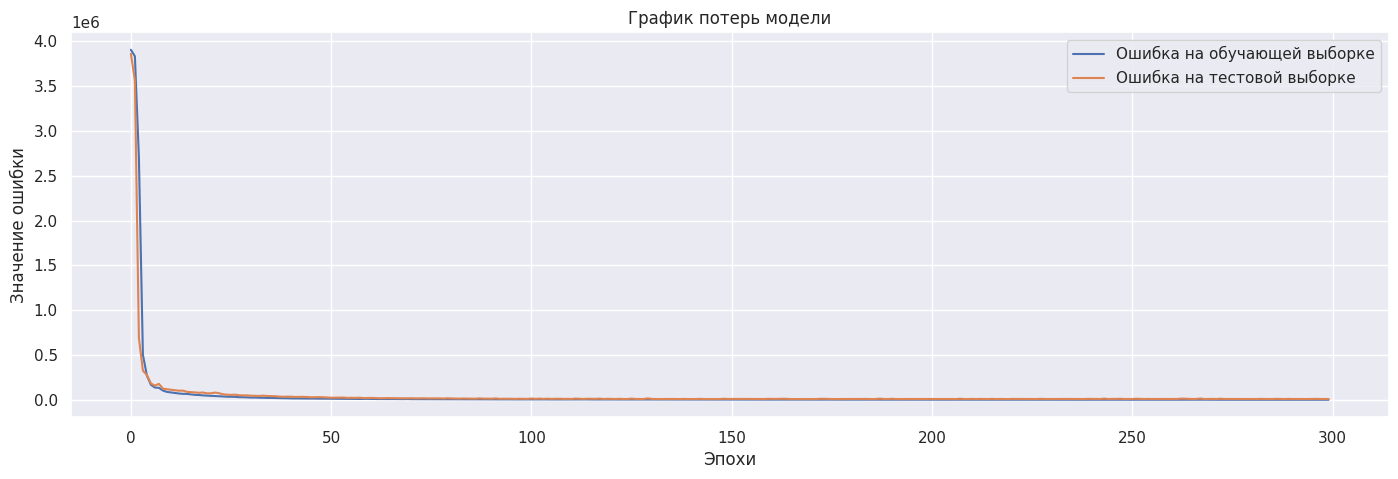

In [ ]:
# Посмотрим на график потерь на тренировочной и тестовой выборках
def model_loss_plot(train_hist):
    plt.figure(figsize = (17,5))
    plt.plot(train_hist.history['loss'],
             label = 'ошибка на обучающей выборке')
    plt.plot(train_hist.history['val_loss'],
            label = 'ошибка на тестовой выборке')
    plt.title('График потерь модели')
    plt.ylabel('Значение ошибки')
    plt.xlabel('Эпохи')
    plt.legend(['Oшибка на обучающей выборке', 'Ошибка на тестовой выборке'], loc='best')
    plt.show()
model_loss_plot(train_hist)

In [ ]:
# Сохраняем датафрейм для разработки веб-приложения для прогнозирования соотношения "Прочность при растяжении, МПа" в фреймворке Flask
df.to_excel("df_itog.xlsx")
scaled_df.to_excel("scaled_df_itog.xlsx")

В ходе проведенной работы выяснилось, что лучший результат показываем модель линейной регрессии, её и будем использовать в приложении


In [ ]:
from joblib import dump, load
from sklearn.linear_model import LinearRegression
import os

try:
    # Проверяем существование модели
    if 'lr' not in locals():
        print("Создаем новую модель...")
        lr = LinearRegression()
        lr.fit(X_train, y_train)  # Обучение модели

    # Сохранение модели
    model_path = "model.pkl"
    dump(lr, model_path)

    # Проверка сохранения
    if os.path.exists(model_path):
        print(f"Модель успешно сохранена в {model_path}")
        print(f"Размер файла: {os.path.getsize(model_path)/1024:.2f} KB")

        # Пример загрузки
        loaded_model = load(model_path)
        print("Модель успешно загружена!")
    else:
        print("Ошибка: файл модели не был создан")

except Exception as e:
    print(f"Произошла ошибка: {str(e)}")

Модель успешно сохранена в model.pkl
Размер файла: 1.51 KB
Модель успешно загружена!
